<a href="https://colab.research.google.com/github/Larr014/DataMining/blob/master/TextMining_RF_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [21]:
df = pd.read_csv('/content/corona_fake.csv')
df

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake
...,...,...,...,...
1159,Could the Power of the Sun Slow the Coronavirus?,A study suggests that ultraviolet rays could s...,https://www.nytimes.com/,TRUE
1160,Key evidence for coronavirus spread is flawed ...,"Last week, a medical journal reported that a b...",https://www.nytimes.com/,TRUE
1161,Summer Heat May Not Diminish Coronavirus Strength,"A new report, sent to the White House science ...",https://www.nytimes.com/,TRUE
1162,How Long Will a Vaccine Really Take?,A vaccine would be the ultimate weapon against...,https://www.nytimes.com/,TRUE


In [22]:
df['title'] = df['title'].fillna("")
df['text'] = df['text'].fillna("")
df

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake
...,...,...,...,...
1159,Could the Power of the Sun Slow the Coronavirus?,A study suggests that ultraviolet rays could s...,https://www.nytimes.com/,TRUE
1160,Key evidence for coronavirus spread is flawed ...,"Last week, a medical journal reported that a b...",https://www.nytimes.com/,TRUE
1161,Summer Heat May Not Diminish Coronavirus Strength,"A new report, sent to the White House science ...",https://www.nytimes.com/,TRUE
1162,How Long Will a Vaccine Really Take?,A vaccine would be the ultimate weapon against...,https://www.nytimes.com/,TRUE


In [24]:
df['label'].unique()

array(['Fake', nan, 'TRUE', 'fake'], dtype=object)

In [26]:
df = df.dropna()
df['label'] = df['label'].str.capitalize()
df['label'].unique()

array(['Fake', 'True'], dtype=object)

In [27]:
df['labelInt']=pd.Categorical(df['label']).codes
df

,title,text,source,label,labelInt
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake,0
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake,0
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake,0
3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake,0
4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake,0
...,...,...,...,...,...
1159,Could the Power of the Sun Slow the Coronavirus?,A study suggests that ultraviolet rays could s...,https://www.nytimes.com/,True,1
1160,Key evidence for coronavirus spread is flawed ...,"Last week, a medical journal reported that a b...",https://www.nytimes.com/,True,1
1161,Summer Heat May Not Diminish Coronavirus Strength,"A new report, sent to the White House science ...",https://www.nytimes.com/,True,1
1162,How Long Will a Vaccine Really Take?,A vaccine would be the ultimate weapon against...,https://www.nytimes.com/,True,1


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
vectorizer.get_feature_names_out()

array(['00', '000', '00000073', ..., 'μg', 'μm', '方啟泰'], dtype=object)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['labelInt'],
                                                    test_size=0.2, random_state=6#42
                                                    )

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
clf.classes_

array([0, 1], dtype=int8)

acc: 0.9213973799126638
precision: 0.9210586793320055
recall: 0.9210586793320055
f1: 0.9213973799126638


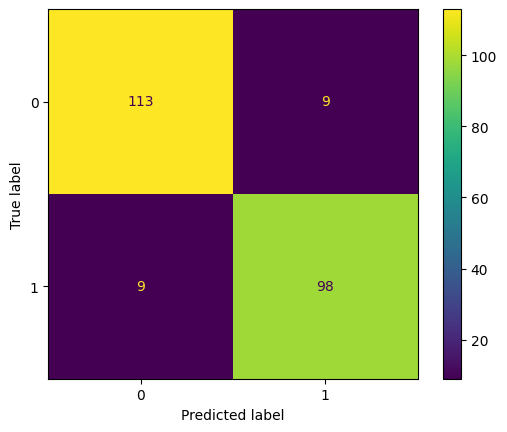

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=clf.classes_
 #['Sobrevive','No Sobrevive']
                                           ).plot(values_format='d')
